In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import quad

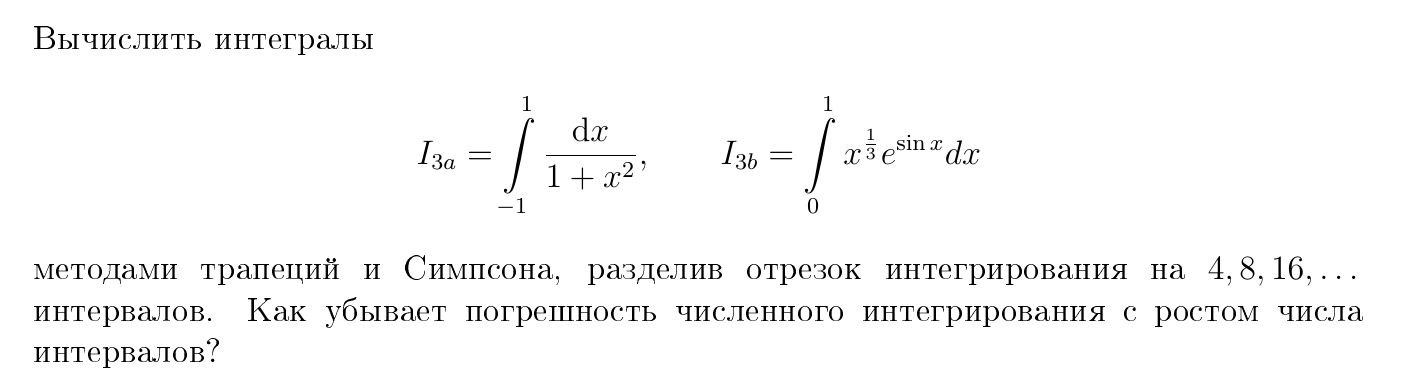

In [2]:
Image(filename='task 3.png')

In [3]:
f = lambda x: 1/(1 + x ** 2)
g = lambda x: x ** (1/3.0) * np.exp(np.sin(x))

In [4]:
n = 4096

f_left = -1
f_right = 1

g_left = 0
g_right = 1

f_ref, _ = quad(f, f_left, f_right)
g_ref, _ = quad(g, g_left, g_right)

In [5]:
def Trapeze(func, left, right, n_intervals):
    dots = np.linspace(left, right, n_intervals+1)
    values = np.vectorize(func)(dots)

    return (right-left)/(2*n_intervals) * np.sum(values[1:]+values[:-1])


In [6]:
def Simpson(func, left, right, n_intervals):
    dots = np.linspace(left, right, n_intervals+1)
    values = np.vectorize(func)(dots)

    return (right-left)/(3*n_intervals)*np.sum(values[0:-1:2] + values[2::2] + 4*values[1::2])

In [7]:
print("Trapeze method for f function gives result %1.10f using %d intervals" %
      (Trapeze(f, f_left, f_right, n), n))

print("Trapeze method for g function gives result %1.10f using %d intervals" %
      (Trapeze(g, g_left, g_right, n), n))

print()

print("Simpson method for f function gives result %1.10f using %d intervals" %
      (Simpson(f, f_left, f_right, n), n))

print("Simpson method for g function gives result %1.10f using %d intervals" %
      (Simpson(g, g_left, g_right, n), n))

print()

print("Ref for f function: %1.10f" % f_ref)
print("Ref for g function: %1.10f" % g_ref)

Trapeze method for f function gives result 1.5707963069 using 4096 intervals
Trapeze method for g function gives result 1.2958697867 using 4096 intervals

Simpson method for f function gives result 1.5707963268 using 4096 intervals
Simpson method for g function gives result 1.2958719208 using 4096 intervals

Ref for f function: 1.5707963268
Ref for g function: 1.2958740087


In [8]:
def GetDiffs(splits, method, func, l, r, ref_value):
    return [abs(method(func, l, r, i)-ref_value) for i in splits]

In [9]:
divs_to = 17
divs = [pow(2, i) for i in range(1, divs_to)]

trapeze_f_diffs = GetDiffs(divs, Trapeze, f, f_left, f_right, f_ref)
simpson_f_diffs = GetDiffs(divs, Simpson, f, f_left, f_right, f_ref)

trapeze_g_diffs = GetDiffs(divs, Trapeze, g, g_left, g_right, g_ref)
simpson_g_diffs = GetDiffs(divs, Simpson, g, g_left, g_right, g_ref)

Text(0.5, 1.0, 'g')

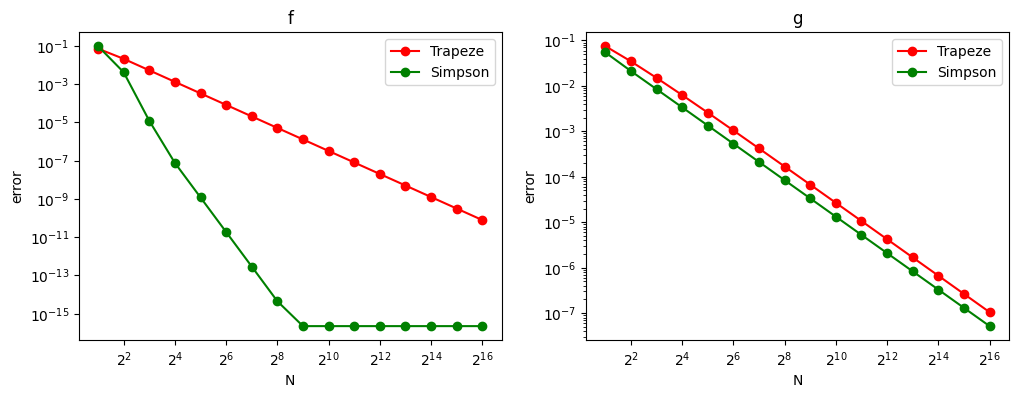

In [10]:
fig = plt.figure(figsize=(12, 4))
plt_f = fig.add_subplot(121)
plt_g = fig.add_subplot(122)

plt_f.plot(divs, trapeze_f_diffs, 'ro-', label='Trapeze')
plt_f.plot(divs, simpson_f_diffs, 'go-', label='Simpson')
plt_f.set_xlabel('N')
plt_f.set_ylabel('error')
plt_f.set_yscale('log', base=10)
plt_f.set_xscale('log', base=2)
plt_f.legend(loc="upper right")
plt_f.set_title('f')

plt_g.plot(divs, trapeze_g_diffs, 'ro-', label='Trapeze')
plt_g.plot(divs, simpson_g_diffs, 'go-', label='Simpson')
plt_g.set_xlabel('N')
plt_g.set_ylabel('error')
plt_g.set_yscale('log', base=10)
plt_g.set_xscale('log', base=2)
plt_g.legend(loc="upper right")
plt_g.set_title('g')